## **Reading Dataset**

---



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
# from google.colab import files
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# uploaded = files.upload()

# #Reading data
# data = pd.read_csv(io.BytesIO(uploaded['headbrain.csv']))
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head


(237, 4)


<bound method NDFrame.head of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

**Gathering X and Y**

In [2]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# **Mathemeatical Calculations**

---



In [3]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total Number of Values
m = len(X)

# Using formula to calculate b0 and b1
numer = 0
denom = 0
for i  in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2

b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Coeficients b0 and b1
print(b1, b0)

0.26342933948939945 325.57342104944223


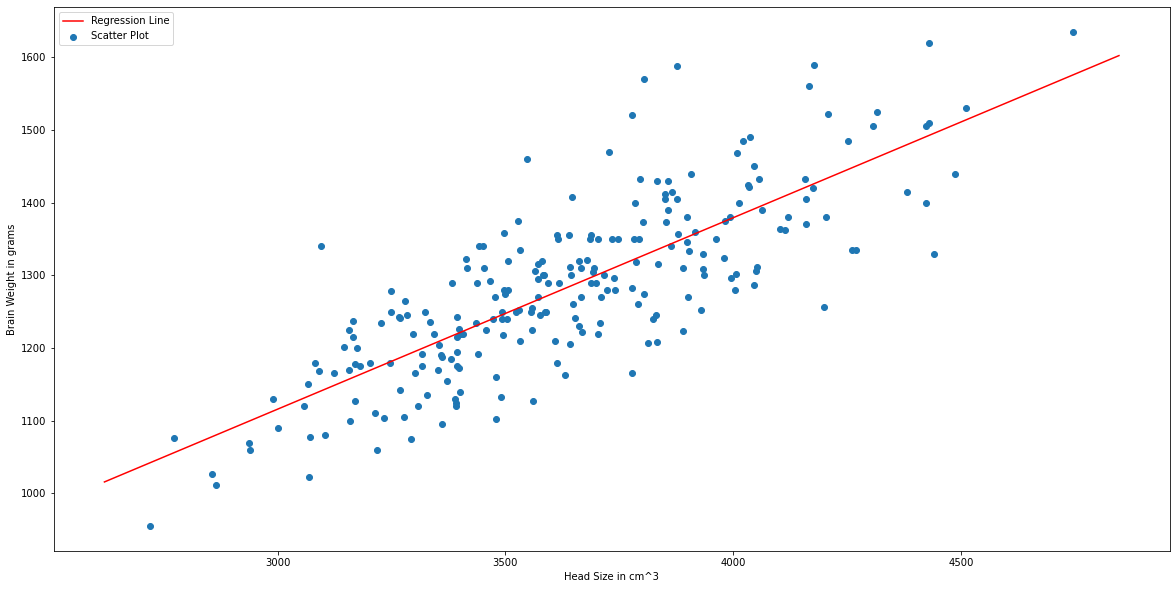

In [4]:
# Plotting values and Regresssion line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting Line
plt.plot(x,y, label = 'Regression Line', color = 'red')

# Plotting Scatter Points
plt.scatter(X, Y, label = 'Scatter Plot')

plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [5]:
sum1 = 0
sum2 = 0
for i in range(m):
  y_pred = b0 + b1 * X[i]
  sum1 += (Y[i] - mean_y) ** 2
  sum2 += (Y[i] - y_pred) ** 2
  print(y_pred)

r2 = 1 - (sum2/sum1)
print(r2)


1514.1666008256125
1310.2722920608173
1448.0458366137732
1320.546036300904
1425.9177720966638
1269.9676031189392
1322.6534710168191
1263.118440292215
1277.3436246246424
1374.549050896231
1232.5606369114446
1377.4467736306142
1284.4562167908562
1434.0840816208351
1335.034649972821
1346.6255409103546
1246.785821243872
1238.6195117197008
1140.8872267691336
1490.9848189505453
1347.1523995893333
1391.4085286235525
1327.6586284671178
1302.8962705551141
1576.0724956056215
1490.721389611056
1388.7742352286584
1385.0862244758068
1235.4583596458278
1425.390913417685
1323.1803296957978
1325.5511937512024
1406.424000974448
1421.7029026648333
1420.9126146463652
1330.2929218620118
1254.688701428554
1312.9065854557114
1203.8468389071
1245.468674546425
1369.2804641064429
1248.8932559597874
1462.271020946201
1327.6586284671178
1343.2009594969923
1388.2473765496795
1460.427015569775
1159.3272805333913
1284.7196461303456
1285.509934148814
1350.5769810026954
1324.7609057327345
1450.4167006691778
1395.8868

**Covariance Matrix**

---



 EigenValues :  [142421.76643159   4851.92211547]
 EigenVectors :  [[ 0.9645953  -0.26373455]
 [ 0.26373455  0.9645953 ]]


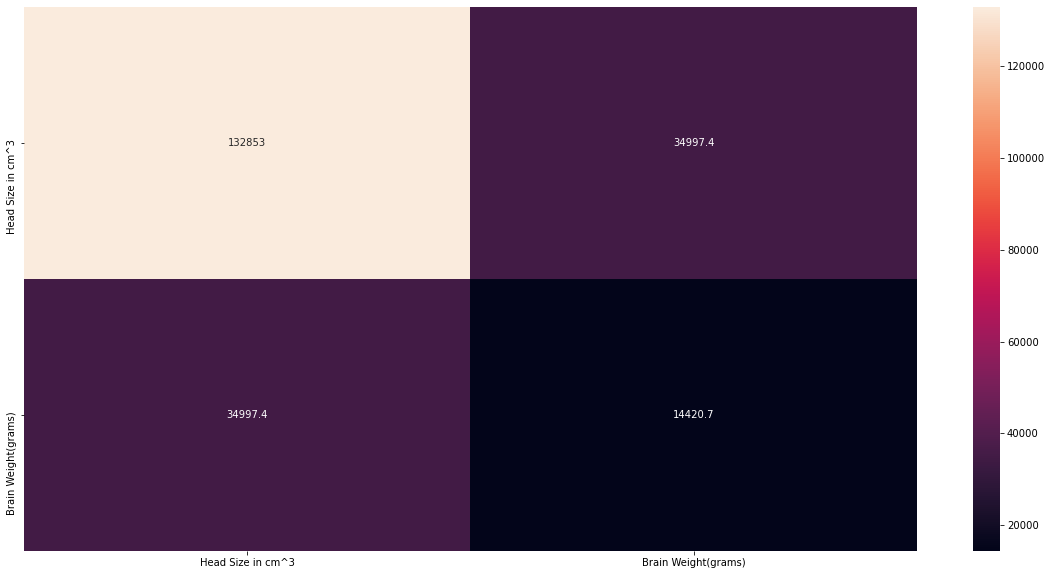

[137379.36613583  37561.54035196]
[137379.36613583  37561.54035196]


In [6]:
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig

data = np.array([X, Y])

# sc = StandardScaler()
# students_scaled = sc.fit_transform(data)

cov = np.cov(data, bias=True)

# Calculate Eigenvalues and Eigenmatrix
eigenvalues, eigenvectors = eig(cov)

print(" EigenValues : ",eigenvalues)
print(" EigenVectors : ",eigenvectors)

labs = ['Head Size in cm^3', 'Brain Weight(grams)']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

# LHS
#
print(cov.dot(eigenvectors[:, 0]))
#
# RHS
#
print(eigenvalues[0]*eigenvectors[:, 0])

# **Linear Regression Using sklearn**

---


0.6393117199570003
[1514.16660083 1310.27229206 1448.04583661 1320.5460363  1425.9177721
 1269.96760312 1322.65347102 1263.11844029 1277.34362462 1374.5490509
 1232.56063691 1377.44677363 1284.45621679 1434.08408162 1335.03464997
 1346.62554091 1246.78582124 1238.61951172 1140.88722677 1490.98481895
 1347.15239959 1391.40852862 1327.65862847 1302.89627056 1576.07249561
 1490.72138961 1388.77423523 1385.08622448 1235.45835965 1425.39091342
 1323.1803297  1325.55119375 1406.42400097 1421.70290266 1420.91261465
 1330.29292186 1254.68870143 1312.90658546 1203.84683891 1245.46867455
 1369.28046411 1248.89325596 1462.27102095 1327.65862847 1343.2009595
 1388.24737655 1460.42701557 1159.32728053 1284.71964613 1285.50993415
 1350.576981   1324.76090573 1450.41670067 1395.88682739 1382.45193108
 1236.512077   1350.31355166 1423.02004936 1362.16787194 1292.09566764
 1343.99124752 1219.38916994 1495.72654706 1445.9384019  1307.37456933
 1202.52969221 1225.18461541 1213.85715381 1492.56539499 1479

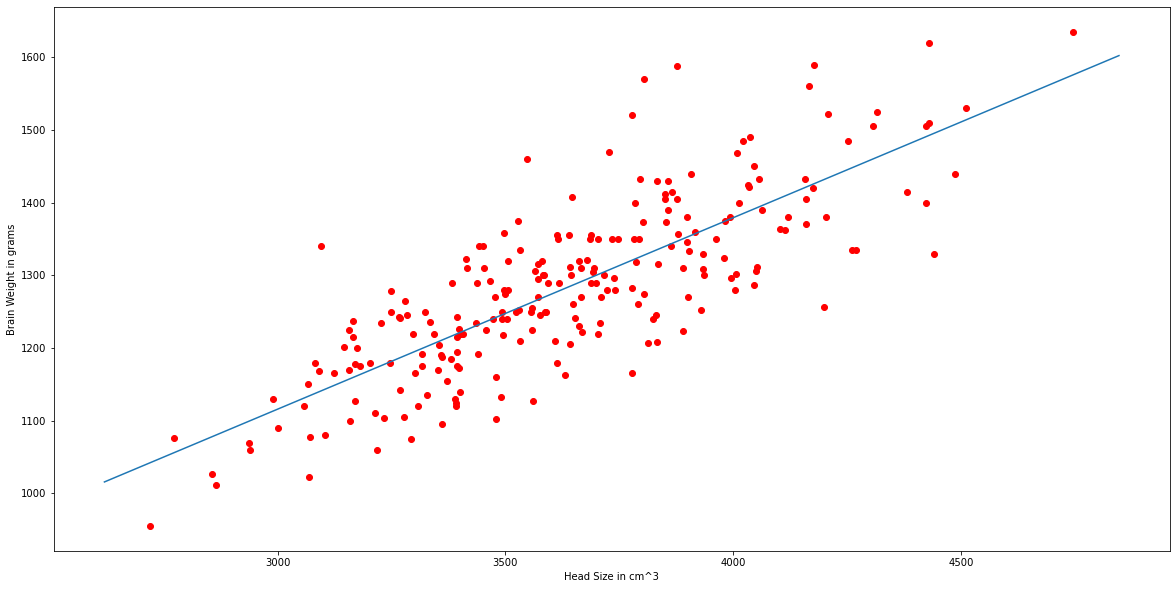

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m,1))

# Creating Model
model = LinearRegression()

# Fitting Training Data
model = model.fit(X, Y)

# Plotting Regression Line
plt.plot(x,y, label = 'Regression Line')

plt.scatter(X, Y, label = 'Scatter Plot', color = 'red')

plt.xlabel('Head Size in cm^3')
plt.ylabel('Brain Weight in grams')

# Y Prediction
Y_pred = model.predict(X)

# R squared Value
r2_score = model.score(X, Y)

print(r2)
print(Y_pred)